# Problem 1 [100 points] Feedback Linearization

Consider the dynamics of one-link robotic arm, given by
\begin{align*}
J_{1}\ddot{q}_{1} + F_{1}\dot{q}_{1} + \frac{K}{N}\left(q_2 - \frac{q_1}{N}\right) &= \tau,\\
J_{2}\ddot{q}_{2} + F_{2}\dot{q}_{2} + K\left(q_2 - \frac{q_1}{N}\right) &= -mgd\cos q_2,
\end{align*}
where $q_1,q_2$ denote angular positions (in rad), and $\tau$ denotes the actuation torque. The parameters $\{J_i,F_i\}_{i=1}^{2}$ respectively denote the moments of inertia and rotational damping coeffcients of the actuator shaft (for $i=1$) and the link (for $i=2$), respectively. The parameters $K,N,m,d$ denote the torsional spring constant, the transmission gear ratio, mass of the link, and distance of the center of gravity of the link from a fixed frame of reference, respectively. The **state vector** is $x:=(q_1,q_2,\dot{q}_1,\dot{q}_2)^{\top}\in [0,2\pi)^{2}\times\mathbb{R}^{2}$ and the **control input** is $u:=\tau\in\mathbb{R}$.

## (a) [(5+5) + 20 = 30 points] Deciding feedback linearizability

(i) Write the dynamics of the robotic arm in **standard control-affine form** $\dot{x} = f(x) + g(x) u$, i.e., **explicitly write** the drift vector field $f(x)$ and the input vector field $g(x)$, both of size $4\times 1$, in terms of the state components $x_1, x_2,x_3,x_4$ and the parameters.

1. We can do some algebra on each equation to isolate the $\ddot{q_1}$ and $\ddot{q_2}$ terms on the RHS, and given $\tau = u$, we can express the dynamics as:
\begin{align}
\dot{x} & = \left[\begin{matrix} \dot{x_1} \\ \dot{x_2} \\ \dot{x_3} \\ \dot{x_4} \end{matrix}\right] = \left[\begin{matrix} \dot{q_1} \\ \dot{q_2} \\ \ddot{q_1} \\ \ddot{q_2} \end{matrix}\right] = \left[\begin{matrix} x_3 \\ x_4 \\ \frac{- F_{1} \dot{q_1} - \frac{K \left(q_2 - \frac{q_1}{N}\right)}{N}}{J_{1}} \\ \frac{- F_{2} \dot{q_2} - K \left(q_2 - \frac{q_1}{N}\right) - d g m \cos{q_2}}{J_{2}}\end{matrix}\right] + \left[\begin{matrix}0\\0\\\frac{1}{J_{1}}\\0\end{matrix}\right] u \\
& = \left[\begin{matrix}x_{3}\\x_{4}\\- \frac{F_{1} x_{3}}{J_{1}} - \frac{K x_{2}}{J_{1} N} + \frac{K x_{1}}{J_{1} N^{2}}\\- \frac{F_{2} x_{4}}{J_{2}} - \frac{G d m \cos{\left(x_{2} \right)}}{J_{2}} - \frac{K x_{2}}{J_{2}} + \frac{K x_{1}}{J_{2} N}\end{matrix}\right] \left( f\left(x\right) \right) + \left[\begin{matrix}0\\0\\\frac{1}{J_{1}}\\0\end{matrix}\right] \left( g\left(x\right) \right) u
\end{align}

(ii) Determine the region in the state space $[0,2\pi)^{2}\times\mathbb{R}^{2}$, over which this system is full state static feedback linearizable. (**Hint:** use Lec. 16 p. 11, also Step 1 in p. 12.)

1. From Lec 16 pg 11, condition (i) we check is that the $M$ matrix has full rank. We see that:
\begin{align}
M & = \left[\begin{matrix} g(x^{0}) && adj_{f} g (x^{0}) && adj_{f}^{2} g(x^{0}) && adj_{f}^{3} g(x^{0}) \end{matrix}\right] \\ & = \left[\begin{matrix}0 & - \frac{1}{J_{1}} & - \frac{F_{1}}{J_{1}^{2}} & - \frac{F_{1}^{2}}{J_{1}^{3}} - \frac{K}{J_{1}^{2} N^{2}}\\0 & 0 & 0 & - \frac{K}{J_{1} J_{2} N}\\\frac{1}{J_{1}} & \frac{F_{1}}{J_{1}^{2}} & \frac{F_{1}^{2}}{J_{1}^{3}} + \frac{K}{J_{1}^{2} N^{2}} & \frac{F_{1}^{3}}{J_{1}^{4}} + \frac{2 F_{1} K}{J_{1}^{3} N^{2}}\\0 & 0 & \frac{K}{J_{1} J_{2} N} & \frac{K \left(F_{1} J_{2} + F_{2} J_{1}\right)}{J_{1}^{2} J_{2}^{2} N}\end{matrix}\right]
\end{align}
<br>
2. $rank(M) = 4 = n$, it is **full rank** over $[0,2\pi)^{2}\times\mathbb{R}^{2}$ since **no entries are a function of any element of the state**, they are all constant parameters.
<br>
3. We also need to check condition (ii) from the same reference, we see that:
\begin{align}
\left[\begin{matrix} g(x^{0}) && adj_{f} g (x^{0})\end{matrix}\right] = \left[\begin{matrix} 0 \\ 0 \\ 0 \\ 0\end{matrix}\right] \\
\left[\begin{matrix} g(x^{0}) && adj_{f}^{2} g (x^{0})\end{matrix}\right] = \left[\begin{matrix} 0 \\ 0 \\ 0 \\ 0\end{matrix}\right] \\
\left[\begin{matrix} adj_{f} g (x^{0}) && adj_{f}^{2} g (x^{0})\end{matrix}\right] = \left[\begin{matrix} 0 \\ 0 \\ 0 \\ 0\end{matrix}\right]
\end{align}
<br>
4. For each of the lie brackets in 3., we see that the lie bracket does **not** add rank, and each 2 pair of $g(x^{0})$, $adj_{f} g(x^{0})$, $adj_{f}^{2} g(x^{0})$ are  **not** full rank (they are rank(2)). Combining each pair of $g(x^{0})$, $adj_{f} g(x^{0})$, $adj_{f}^{2} g(x^{0})$ with the pair's lie bracket would still be **rank(2) < rank(3)**.
<br>
5. Then by definition the span is closed under Lie bracket, **is involutive** over $[0,2\pi)^{2}\times\mathbb{R}^{2}$
<br>
6. Then from Lec 16 pg 11, we've checked for the 2 constructive conditions, and from 16 pg 12, Step 1, we've verified the **system is feedback linearizable**

### (b) [10 + 10 = 20 points] Finding $\lambda(x)$ and $r$

(i) **Show that** the scalar field $\lambda(x)$ in the Theorem given in Lec. 16 p. 10, for this system, can be taken as $\lambda(x)=x_2$. (**Hint:** use Lec. 16 p. 13, Step 2.)

1. We can see that for $\lambda(x) = x_2$, $\frac{\partial{\lambda}}{\partial{x}} = \left[\begin{matrix} 0 \\ 1 \\ 0 \\ 0\end{matrix}\right]$
<br>
2. We also can see that since $g(x^{0})[2] = adj_{f} g(x^{0})[2] = adj_{f}^{2} g(x^{0})[2] = 0$:
\begin{align}
\mathcal{L}_{g} \lambda(x) = \left[\begin{matrix}0&&0&&\frac{1}{J_{1}}&&0\end{matrix}\right] \left[\begin{matrix} 0 \\ 1 \\ 0 \\ 0\end{matrix}\right] & = 0 \\
\mathcal{L}_{adj_{f} g(x^{0})} \lambda(x) = \left[\begin{matrix}- \frac{1}{J_{1}} & 0 & \frac{F_{1}}{J_{1}^{2}} & 0\end{matrix}\right] \left[\begin{matrix} 0 \\ 1 \\ 0 \\ 0\end{matrix}\right] & = 0\\
\mathcal{L}_{adj_{f}^{2} g(x^{0})} \lambda(x) = \left[\begin{matrix}- \frac{F_{1}}{J_{1}^{2}} & 0 & \frac{F_{1}^{2}}{J_{1}^{3}} + \frac{K}{J_{1}^{2} N^{2}} & \frac{K}{J_{1} J_{2} N}\end{matrix}\right] \left[\begin{matrix} 0 \\ 1 \\ 0 \\ 0\end{matrix}\right] & = 0\\
\end{align}
<br>
3. We can also see that since $adj_{f}^{3} g(x^{0})[2] \neq 0$:
\begin{align}
\mathcal{L}_{adj_{f}^{3} g(x^{0})} \lambda(x) = \left[\begin{matrix}- \frac{F_{1}^{2}}{J_{1}^{3}} - \frac{K}{J_{1}^{2} N^{2}} & - \frac{K}{J_{1} J_{2} N} & \frac{F_{1}^{3}}{J_{1}^{4}} + \frac{2 F_{1} K}{J_{1}^{3} N^{2}} & \frac{K \left(F_{1} J_{2} + F_{2} J_{1}\right)}{J_{1}^{2} J_{2}^{2} N}\end{matrix}\right]
 \left[\begin{matrix} 0 \\ 1 \\ 0 \\ 0\end{matrix}\right] & = - \frac{K}{J_{1} J_{2} N} \neq 0\\
\end{align}
<br>
4. Then from Lec 16 pg 13, Step 2, we see that $\lambda(x) = x_2$ **satisfies the desired system of PDEs**.

(ii) **By directly computing the relative degree** $r$ (a positive integer), **prove that** the state equation derived in part (a)(i), augmented with the output equation $y=\lambda(x)=x_2$, indeed has relative degree 4, that is, satisfies the $r=n$ condition in the region determined in part (a)(ii). (**Hint:** use Lec. 15 p. 12 for computing the relative degree)

1. We can show first that for our system, $y = h(x) = \lambda(x) = x_2$, and:
\begin{align}
\mathcal{L}_{g} \mathcal{L}_{f}^{0} h & = \mathcal{L}_{g} h = \mathcal{L}_{g} \lambda(x) = \left[\begin{matrix}0&0&\frac{1}{J_{1}}&0\end{matrix}\right] \left[\begin{matrix} 0 \\ 1 \\ 0 \\ 0\end{matrix}\right] = 0 \\
\mathcal{L}_{g} \mathcal{L}_{f}^{1} h & = \mathcal{L}_{g} \left< \frac{\partial{h}}{\partial{x}}, f \right> = \mathcal{L}_{g} \left< \left[\begin{matrix} 0 & 1 & 0 & 0\end{matrix}\right], f \right> = \mathcal{L}_{g} x_4 = \left[\begin{matrix}0&0&\frac{1}{J_{1}}&0\end{matrix}\right] \left[\begin{matrix} 0 \\ 0 \\ 0 \\ 1\end{matrix}\right] = 0 \\
\mathcal{L}_{g} \mathcal{L}_{f}^{2} h & = \mathcal{L}_{g} \left< \frac{\partial{}}{\partial{x}} \mathcal{L}_{f}^{1} h , f \right> = \mathcal{L}_{g} \left< \frac{\partial{}}{\partial{x}} x_4 , f \right> = \mathcal{L}_{g} \left< \left[\begin{matrix} 0 \\ 0 \\ 0 \\ 1\end{matrix}\right] , f \right> \\
 & = \mathcal{L}_{g} f[3] = \left< \frac{\partial{}}{\partial{x}} f[3], g\right> = \left< \left[\begin{matrix}\frac{K}{J_{2} N} & \frac{- K + d g m \sin{\left(x_{2}\right)}}{J_{2}} & 0 & - \frac{F_{2}}{J_{2}}\end{matrix}\right]
, \left[\begin{matrix}0 \\ 0 \\ \frac{1}{J_{1}} \\ 0\end{matrix}\right] \right> = 0 \\
\mathcal{L}_{g} \mathcal{L}_{f}^{3} h & = \mathcal{L}_{g} \left< \frac{\partial{}}{\partial{x}} \mathcal{L}_{f}^{2} h , f \right> = \mathcal{L}_{g} \left< \frac{\partial{}}{\partial{x}} f[3], f\right> \\
& = \left< \frac{\partial{}}{\partial{x}} \mathcal{L}_{f}^{3} h , g\right> = \frac{K}{J_{1} J_{2} N} \neq 0
\end{align}
<br>
2. From 1., we see that $\mathcal{L}_{g} \mathcal{L}_{f}^{0} h = \mathcal{L}_{g} \mathcal{L}_{f}^{1} h = \mathcal{L}_{g} \mathcal{L}_{f}^{2} h = 0$, and $\mathcal{L}_{g} \mathcal{L}_{f}^{3} h \neq 0$.
<br>
3. This means t hat it will at $r = 3 + 1$, $y = \lambda(x) = x_2$, $y^{\mathcal{r}} = \mathcal{L}_{f}^{4} \lambda(x) + \mathcal{L}_{g} \mathcal{L}_{f}^{3} \lambda(x) u$ has a **nonzero u** coefficient. 
<br>
4. From 2. and Lec 15 pg 12, we prove that this SISO system has relative degree $3 + 1 = 4 = n$

## (c) [(5+5+5+5) + 5 + 25 = 50 points] Normal form and closed loop simulation

(i) Use the Steps 3 and 4 in Lec. 16 p. 14-15 to **derive the feedback linearizing tuple** $(\tau(\cdot),\alpha(\cdot),\beta(\cdot))$. **Also clearly write down** the control system in the feedback linearized coordinates with the new $4\times 1$ state vector $z$ and the new control $v\in\mathbb{R}$, where $z:=\tau(x)$ and $u=\alpha(x)+\beta(x)v$.

1. We can derive $\alpha(\cdot)$:
\begin{align}
\alpha(x) & = \frac{-\left< \frac{\partial{}}{\partial{x}} \mathcal{L}_{f}^{3} h , f\right>}{\left< \frac{\partial{}}{\partial{x}} \mathcal{L}_{f}^{3} h , g\right>} \\
& = F_{1} x_{3} + \frac{F_{2}^{3} J_{1} N x_{4}}{J_{2}^{2} K} + \frac{F_{2}^{2} G J_{1} N d m \cos{\left(x_{2} \right)}}{J_{2}^{2} K} + \frac{F_{2}^{2} J_{1} N x_{2}}{J_{2}^{2}} - \frac{F_{2}^{2} J_{1} x_{1}}{J_{2}^{2}} \\
& + \frac{2 F_{2} G J_{1} N d m x_{4} \sin{\left(x_{2} \right)}}{J_{2} K} - \frac{2 F_{2} J_{1} N x_{4}}{J_{2}} + \frac{F_{2} J_{1} x_{3}}{J_{2}} \\
& + \frac{G^{2} J_{1} N d^{2} m^{2} \sin{\left(x_{2} \right)} \cos{\left(x_{2} \right)}}{J_{2} K} - \frac{G J_{1} N d m \operatorname{x_{4}}^{2}{\left(t \right)} \cos{\left(x_{2} \right)}}{K} \\
& + \frac{G J_{1} N d m x_{2} \sin{\left(x_{2} \right)}}{J_{2}} - \frac{G J_{1} N d m \cos{\left(x_{2} \right)}}{J_{2}} - \frac{G J_{1} d m x_{1} \sin{\left(x_{2} \right)}}{J_{2}} \\ & - \frac{J_{1} K N x_{2}}{J_{2}} + \frac{J_{1} K x_{1}}{J_{2}} + \frac{K x_{2}}{N} - \frac{K x_{1}}{N^{2}}
\end{align}
<br>
2. We can derive $\beta(\cdot)$:
\begin{align}
\beta(x) & = \frac{1}{\mathcal{L}_{g} \mathcal{L}_{f}^{3} \lambda(x)} = \frac{J_{1} J_{2} N}{K}
\end{align}
<br>
3. We can derive $\tau(\cdot)$:
\begin{align}
z = \tau(x) & = \left( \begin{matrix} \lambda(x) \\ \mathcal{L}_{f} \lambda(x) \\ \mathcal{L}_{f}^{2} \lambda(x) \\ \mathcal{L}_{f}^{3} \lambda(x)\end{matrix} \right) \\
\left[\begin{matrix} z_1 \\ z_2 \\ z_3 \\ z_4 \end{matrix}\right] & = \left[\begin{matrix}x_2 \\ x_4\\ - \frac{F_{2} x_{4}}{J_{2}} - \frac{G d m \cos{\left(x_{2} \right)}}{J_{2}} - \frac{K x_{2}}{J_{2}} + \frac{K x_{1}}{J_{2} N}
 \\ - \frac{F_{2} \left(- \frac{F_{2} x_{4}}{J_{2}} - \frac{G d m \cos{\left(x_{2} \right)}}{J_{2}} - \frac{K x_{2}}{J_{2}} + \frac{K x_{1}}{J_{2} N}\right)}{J_{2}} + \left(\frac{G d m \sin{\left(x_{2} \right)}}{J_{2}} - \frac{K}{J_{2}}\right) x_{4} + \frac{K x_{3}}{J_{2} N}  \end{matrix}\right]
\end{align}
<br>
4. Finally, for the new control system in new coordinates:
\begin{align}
\left( \begin{matrix} \dot{z_1} \\ \dot{z_2} \\ \dot{z_3} \\ \dot{z_4} \end{matrix} \right) & = \left[\begin{matrix} 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 \end{matrix}\right] \left( \begin{matrix} z_1 \\ z_2 \\ z_3 \\ z_4 \end{matrix} \right) + \left( \begin{matrix} 0 \\ 0 \\ 0 \\ 1 \end{matrix} \right) v
\end{align}

(ii) Give physical interpretation of the components of the vector $z$ (think of their units). 

1. We see that for the elements of $z = \tau(x)$
<br>
2. $z_1$ is joint position
<br>
3. $z_2$ is velocity of that joint
<br>
4. $z_3$ is the acceleration of that joint, as we derived in (a)(i) for $\ddot{q_2}$
<br>
5. $z_4$ is the Lie derivative of $z_3 = \ddot{q_2}$ along $f$, intuitively it is how the acceleration term $z_3 = \ddot{q_2}$ changes as we move along the system dynamics vector field $f$.

(iii) **Use a simple pole placement controller** $v=k^{\top}z$ where $k:=(k_1,k_2,k_3,k_4)^{\top}\in\mathbb{R}^{4}$ to stabilize the feedback linearized states to the origin. For this stablizing controller, **submit the plots** for $x_1,x_2,x_3,x_4,u$ versus time $t=0:0.01:5$ with initial condition $x(t=0)=(\pi/6, \pi/3, 1, 2)^{\top}$. (**Hint:** recall that over the region in which the system is feedback linearizable, the map $\tau$ must be a diffeomorphism, and $x=\tau^{-1}(z)$)

1. We can define $x=\tau^{-1}(z)$:
\begin{align}
\tau^{1}(z) = \left( \begin{matrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{matrix} \right) = \left[\begin{matrix}\frac{N \left(F_{2} z_{2} + J_{2} z_{3} + K z_{1} + d g m \cos{\left(z_{1} \right)}\right)}{K}\\z_{1}\\\frac{N \left(F_{2} z_{3} + J_{2} z_{4} + K z_{2} - d g m z_{2} \sin{\left(z_{1} \right)}\right)}{K}\\z_{2}\end{matrix}\right]
\end{align}
<br>
2. We can use $\tau$ to translate the initial state in $x(t=0)$ to $z(t=0)$, and then use the z coordinate closed-loop dynamics ($v=k^{\top}z$) to integrate out $z(t)$:
\begin{align}
\left( \begin{matrix} \dot{z_1} \\ \dot{z_2} \\ \dot{z_3} \\ \dot{z_4} \end{matrix} \right) & = \left[\begin{matrix} 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 \end{matrix}\right] \left( \begin{matrix} z_1 \\ z_2 \\ z_3 \\ z_4 \end{matrix} \right) + \left( \begin{matrix} 0 \\ 0 \\ 0 \\ 1 \end{matrix} \right) \left( \begin{matrix} k_1 & k_2 & k_3 & k_4 \end{matrix} \right) \left( \begin{matrix} z_1 \\ z_2 \\ z_3 \\ z_4 \end{matrix} \right) \\
& = \left[\begin{matrix} 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ k_1 & k_2 & k_3 & k_4 \end{matrix}\right] \left( \begin{matrix} z_1 \\ z_2 \\ z_3 \\ z_4 \end{matrix} \right)
\end{align}
<br>
3. Using the matrix in 2. (the companion matrix), we can see that if we want the eigenvalues to be at -1, -2, -3, -4, then we set the k values = the negative characteristic polynomial coefficients: $k = \left[-24, -50, -35, -10\right]$, and we can plot a simulator output as below, one simulating by z, the other using u and original system dynamics (as expected they are equivalent). Derivation in **derivation_1c.py**, simulation in **1c.py**.

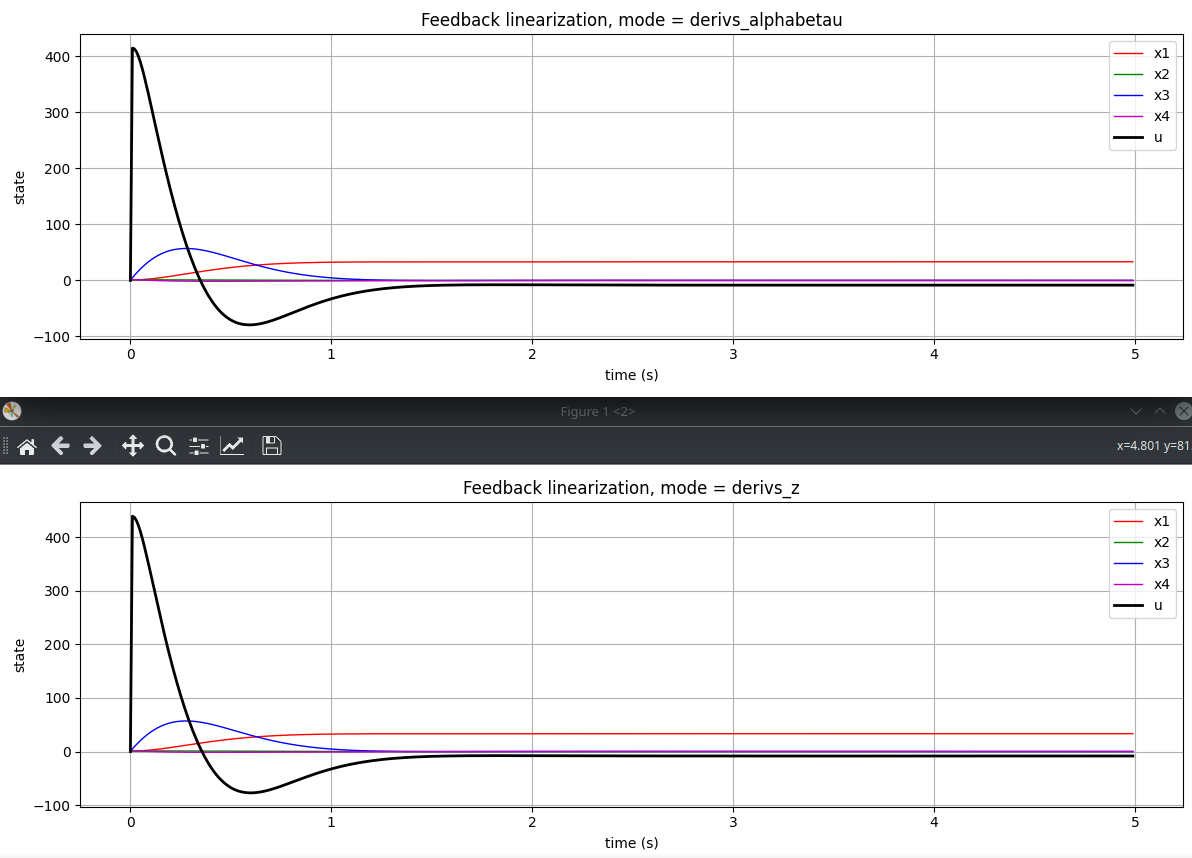

In [1]:
from IPython.display import Image
Image(filename='plot.png')